#📌 Extracão

In [1]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importando os dados
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'
dados = pd.read_json(url)
dados.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
# Normalização da coluna customer
customer = pd.json_normalize(dados['customer']) # Separando os dados
customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [4]:
phone = pd.json_normalize(dados['phone']) # Separando os dados
phone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [5]:
internet = pd.json_normalize(dados['internet']) # Separando os dados
internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [6]:
account = pd.json_normalize(dados['account'])
account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [8]:
# Concatenar os dados
clientes = pd.concat([dados[['customerID','Churn']],customer,phone,internet,account],axis=1)
clientes

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [9]:
# Verificação dos dados no Dataframe

clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [10]:
# Valores únicos
clientes.nunique()

,0
customerID,7267
Churn,3
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3


In [11]:
#  Verificar valores insconsistentes

clientes.isin(['', ' ']).sum().sort_values(ascending=False)

,0
Churn,224
Charges.Total,11
customerID,0
SeniorCitizen,0
gender,0
Partner,0
Dependents,0
PhoneService,0
tenure,0
InternetService,0


In [12]:
# Localizar valores
clientes[clientes['Churn'].isin(['', ' '])][['Churn']]

,Churn
30,
75,
96,
98,
175,
...,...
7158,
7180,
7211,
7239,


In [13]:
# Colunas do DataFrame
clientes.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [14]:
# Verificar valores inválidos

clientes[clientes['Charges.Total'].isin(['', ' '])][['Charges.Total']]

,Charges.Total
975,
1775,
1955,
2075,
2232,
2308,
2930,
3134,
3203,
4169,


In [15]:
# Verificar valores duplicados

clientes.duplicated().sum()

np.int64(0)

In [16]:
# Valores nulos

clientes.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [17]:
# Aplicação de valores nulos na coluna Churn

clientes['Churn'] = clientes['Churn'].replace('',np.nan)
clientes['Churn'].isnull().sum()


np.int64(224)

In [19]:
# Aplicação de valores nulos na coluna 'Charges.Total'
clientes['Charges.Total'] = clientes['Charges.Total'].replace(' ', np.nan)

# Visualização dos valores nulos
clientes['Charges.Total'].isnull().sum()

np.int64(11)

In [20]:
# Deletando as linhas com valores nulos
clientes = clientes.dropna(subset=['Churn'])
clientes = clientes.dropna(subset=['Charges.Total'])

In [21]:
# Verificação de valores vazios e nulos no DataFrame
clientes.isin(['', ' ']).sum().sort_values(ascending=False)

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [22]:
clientes.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [23]:
#  Conversão do coluna Charges.Total do tipo 'object' para 'float'
clientes['Charges.Total'] = clientes['Charges.Total'].astype(np.float64)

In [24]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

# **Padronização dos dados**

In [25]:
# Alteração das colunas que contêm letras maiúsculas para letras minúsculas
clientes.columns = clientes.columns.str.lower().str.strip()

In [26]:
clientes.columns

Index(['customerid', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'charges.monthly',
       'charges.total'],
      dtype='object')

In [27]:
# Renomeando as colunas que possuem mais de um nome
clientes = clientes.rename(columns={
    'customerid': 'customer_id', 'seniorcitizen': 'senior_citizen',
    'phoneservice': 'phone_service', 'multiplelines': 'multiple_lines',
    'internetservice': 'internet_service', 'onlinesecurity': 'online_security',
    'onlinebackup': 'online_backup', 'deviceprotection': 'device_protection',
    'techsupport': 'tech_support', 'streamingtv': 'streaming_tv', 'streamingmovies': 'streaming_movies',
    'paperlessbilling': 'paperless_billing', 'paymentmethod': 'payment_method',
    'charges.monthly': 'charges_monthly', 'charges.total': 'charges_total'
})

In [28]:
clientes.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


# **Alteração de valores textuais com Yes, No para valores binários (0 e 1)**

In [29]:
# Itera para exibir valores únicos de colunas categóricas ('object')
for col in clientes.columns:
    if clientes[col].dtype == 'object':
        print(col, clientes[col].unique())

customer_id ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
churn ['No' 'Yes']
gender ['Female' 'Male']
partner ['Yes' 'No']
dependents ['Yes' 'No']
phone_service ['Yes' 'No']
multiple_lines ['No' 'Yes' 'No phone service']
internet_service ['DSL' 'Fiber optic' 'No']
online_security ['No' 'Yes' 'No internet service']
online_backup ['Yes' 'No' 'No internet service']
device_protection ['No' 'Yes' 'No internet service']
tech_support ['Yes' 'No' 'No internet service']
streaming_tv ['Yes' 'No' 'No internet service']
streaming_movies ['No' 'Yes' 'No internet service']
contract ['One year' 'Month-to-month' 'Two year']
paperless_billing ['Yes' 'No']
payment_method ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [30]:
# Conversão de valores textuais em valores binários e tratamento dos valores 'No internet service' e 'No phone service' para Nan
clientes[['churn', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_backup',
                'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing',
               ]] = clientes[['churn', 'partner', 'dependents', 'phone_service', 'multiple_lines',
                                    'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
                                    'streaming_movies', 'paperless_billing',
               ]].replace({'No': 0, 'Yes': 1, 'No internet service': np.nan, 'No phone service': np.nan})

# Corrigindo aviso de Downcast com o replace no Pandas
clientes = clientes.infer_objects(copy=False)

/tmp/ipython-input-30-144278517.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]].replace({'No': 0, 'Yes': 1, 'No internet service': np.nan, 'No phone service': np.nan})


In [31]:
# Checando os novos valores.
for col in ['churn', 'partner', 'dependents', 'phone_service', 'multiple_lines',
            'online_backup', 'device_protection', 'tech_support',
            'streaming_tv', 'streaming_movies', 'paperless_billing']:
    print(col, clientes[col].unique())

churn [0 1]
partner [1 0]
dependents [1 0]
phone_service [1 0]
multiple_lines [ 0.  1. nan]
online_backup [ 1.  0. nan]
device_protection [ 0.  1. nan]
tech_support [ 1.  0. nan]
streaming_tv [ 1.  0. nan]
streaming_movies [ 0.  1. nan]
paperless_billing [1 0]


# **Criação da colunas Contas Diárias**

In [32]:
clientes['contas_diarias'] = (clientes['charges_monthly'] / 30).round(2)
clientes[['charges_monthly', 'contas_diarias']]

,charges_monthly,contas_diarias
0,65.60,2.19
1,59.90,2.00
2,73.90,2.46
3,98.00,3.27
4,83.90,2.80
...,...,...
7262,55.15,1.84
7263,85.10,2.84
7264,50.30,1.68
7265,67.85,2.26


# **Análise Descritiva**

In [33]:
# Resumo estatístico das colunas numéricas
clientes.describe().round(2)

,churn,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,charges_monthly,charges_total,contas_diarias
count,7032.00,7032.00,7032.00,7032.00,7032.00,7032.0,6352.00,5512.00,5512.00,5512.00,5512.00,5512.0,7032.00,7032.00,7032.00,7032.00
mean,0.27,0.16,0.48,0.30,32.42,0.9,0.47,0.44,0.44,0.37,0.49,0.5,0.59,64.80,2283.30,2.16
std,0.44,0.37,0.50,0.46,24.55,0.3,0.50,0.50,0.50,0.48,0.50,0.5,0.49,30.09,2266.77,1.00
min,0.00,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,18.25,18.80,0.61
25%,0.00,0.00,0.00,0.00,9.00,1.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,35.59,401.45,1.19
50%,0.00,0.00,0.00,0.00,29.00,1.0,0.00,0.00,0.00,0.00,0.00,0.0,1.00,70.35,1397.48,2.34
75%,1.00,0.00,1.00,1.00,55.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0,1.00,89.86,3794.74,2.99
max,1.00,1.00,1.00,1.00,72.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0,1.00,118.75,8684.80,3.96


In [34]:
# Cálculo da média
media = clientes.mean(numeric_only=True)
media

,0
churn,0.265785
senior_citizen,0.162400
partner,0.482509
dependents,0.298493
tenure,32.421786
phone_service,0.903299
multiple_lines,0.467097
online_backup,0.439949
device_protection,0.438679
tech_support,0.370102


In [35]:
# Cálculo da mediana
media = clientes.median(numeric_only=True)
media

,0
churn,0.000
senior_citizen,0.000
partner,0.000
dependents,0.000
tenure,29.000
phone_service,1.000
multiple_lines,0.000
online_backup,0.000
device_protection,0.000
tech_support,0.000


In [36]:
# Cálculo do desvio padrão
media = clientes.std(numeric_only=True)
media

,0
churn,0.441782
senior_citizen,0.368844
partner,0.499729
dependents,0.457629
tenure,24.545260
phone_service,0.295571
multiple_lines,0.498955
online_backup,0.496426
device_protection,0.496271
tech_support,0.482875


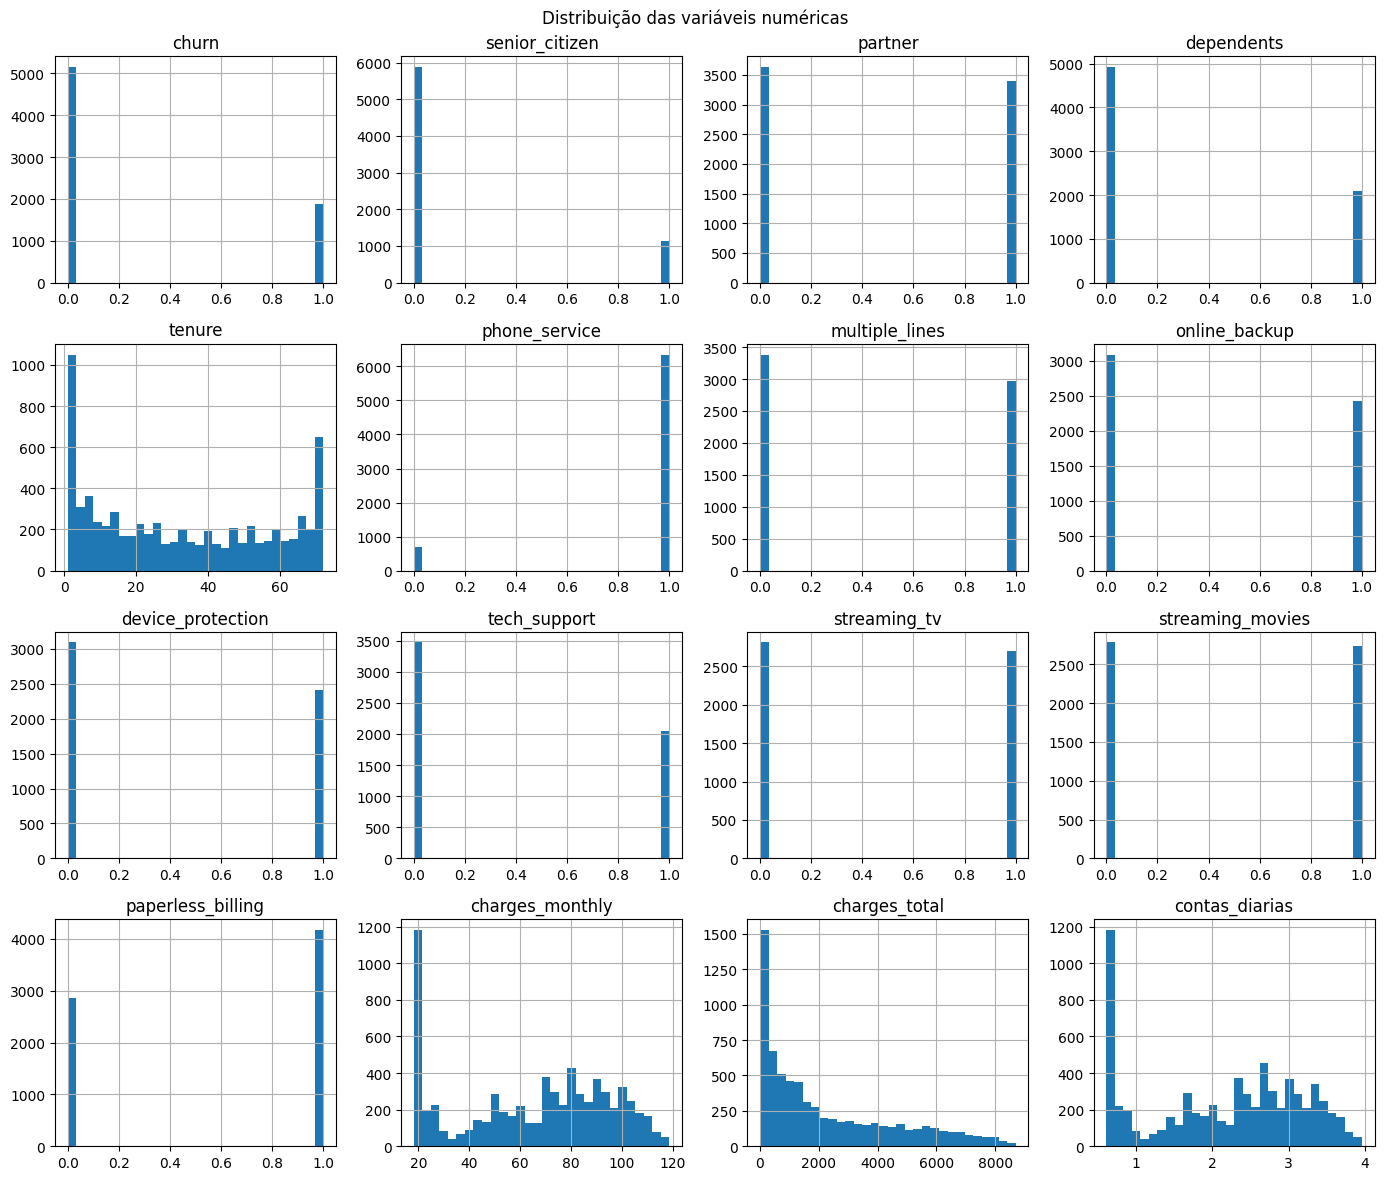

In [37]:
# Distribuição numérica de acordo com a análise descritiva.

clientes.hist(figsize=(14, 12), bins=30)
plt.suptitle('Distribuição das variáveis numéricas')
plt.tight_layout()
plt.show()


# **Distribuição de evasão dos clientes [churn]**

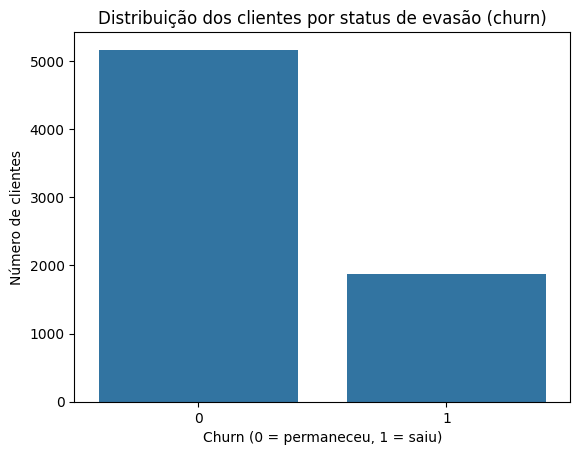

In [38]:
# Mostra quantos clientes ficaram (churn = 0) e quantos saíram (churn = 1)
import seaborn as sns

# Gráfico de contagem de clientes que saíram vs. permaneceram
sns.countplot(data=clientes, x='churn')

plt.title('Distribuição dos clientes por status de evasão (churn)')
plt.xlabel('Churn (0 = permaneceu, 1 = saiu)')
plt.ylabel('Número de clientes')
plt.show()

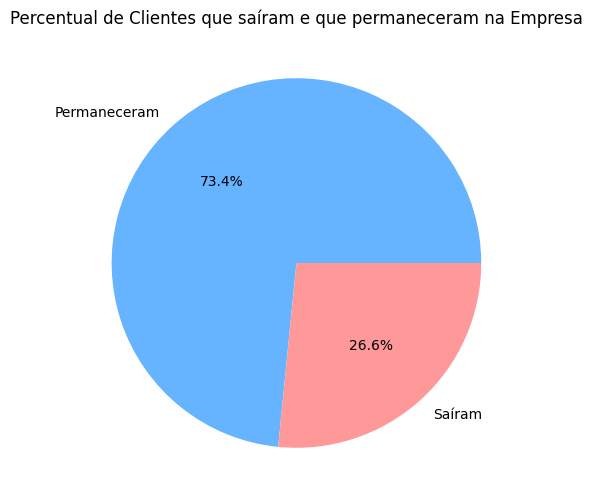

In [43]:
# Mostra a porcentagem de clientes que saíram da empresa e os que continuaram
churn_counts = clientes['churn'].value_counts()

# Gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=['Permaneceram', 'Saíram'], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title('Percentual de Clientes que saíram e que permaneceram na Empresa')
plt.show()

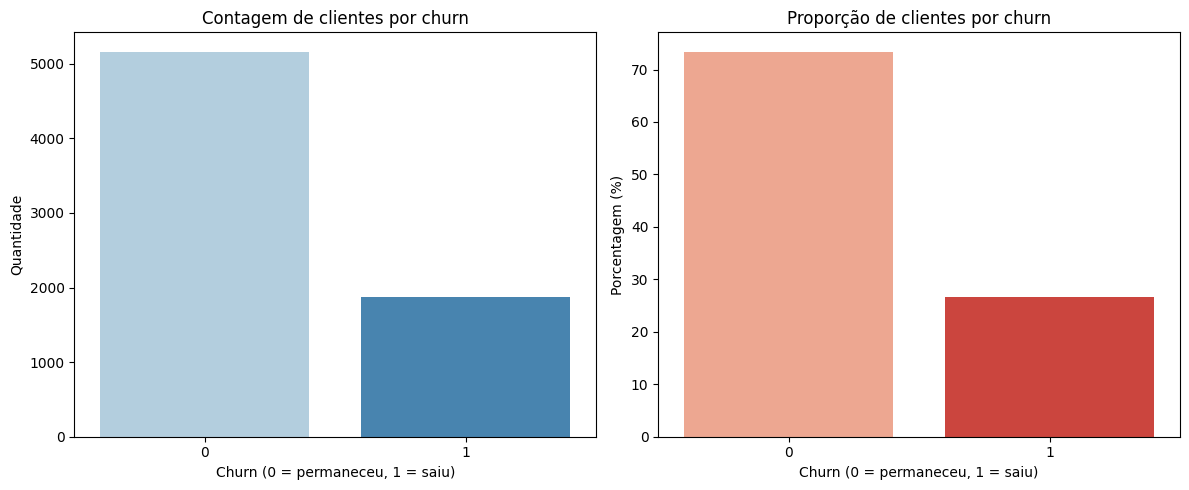

In [44]:
# Conta quantos clientes saíram ou ficaram
churn_counts = clientes['churn'].value_counts()

# Calcula o percentual de cada grupo (saíram / ficaram)
churn_percent = churn_counts / churn_counts.sum() * 100

# Cria dois DataFrames com esses dados para facilitar na hora de plotar os gráficos
df_counts = pd.DataFrame({'churn': churn_counts.index, 'quantidade': churn_counts.values})
df_percent = pd.DataFrame({'churn': churn_percent.index, 'porcentagem': churn_percent.values})

# Cria dois DataFrames com esses dados para facilitar na hora de plotar os gráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Primeiro gráfico: mostra quantos clientes ficaram e quantos saíram (valores absolutos)
sns.barplot(data=df_counts, x='churn', y='quantidade', hue='churn', palette='Blues', ax=axs[0], legend=False)
axs[0].set_title('Contagem de clientes por churn')
axs[0].set_xlabel('Churn (0 = permaneceu, 1 = saiu)')
axs[0].set_ylabel('Quantidade')

# Segundo gráfico: mostra esses mesmos dados em porcentagem
sns.barplot(data=df_percent, x='churn', y='porcentagem', hue='churn', palette='Reds', ax=axs[1], legend=False)
axs[1].set_title('Proporção de clientes por churn')
axs[1].set_xlabel('Churn (0 = permaneceu, 1 = saiu)')
axs[1].set_ylabel('Porcentagem (%)')

plt.tight_layout()
plt.show()

# **Variáveis Categóricas**

In [45]:
# Verificando o tipo de dados, em relação às variáveis categóricas.
print(clientes.dtypes)

customer_id           object
churn                  int64
gender                object
senior_citizen         int64
partner                int64
dependents             int64
tenure                 int64
phone_service          int64
multiple_lines       float64
internet_service      object
online_security       object
online_backup        float64
device_protection    float64
tech_support         float64
streaming_tv         float64
streaming_movies     float64
contract              object
paperless_billing      int64
payment_method        object
charges_monthly      float64
charges_total        float64
contas_diarias       float64
dtype: object


In [46]:
# Checando os valores nulos
clientes.isnull().sum()

,0
customer_id,0
churn,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,680
internet_service,0


In [47]:
# Tratando os valores nulos
colunas_categoricas = [
    'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
    'internet_service', 'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies', 'contract',
    'paperless_billing', 'payment_method'
]

# Preencher valores nulos com 'Desconhecido'
clientes[colunas_categoricas] = clientes[colunas_categoricas].fillna('Unknown')

In [48]:
clientes.isnull().sum()

,0
customer_id,0
churn,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,0
internet_service,0


# **Agrupando os dados por categorias e churn**

In [49]:
from IPython.display import display

# Lista de colunas categóricas
colunas_categoricas = [
    'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
    'internet_service', 'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies', 'contract',
    'paperless_billing', 'payment_method'
]

# Dicionário para armazenar os resultados
tabelas_churn = {}

# Loop para gerar as tabelas de contagem e percentual
for col in colunas_categoricas:
    # Contagem de churn 0 e 1
    contagem = clientes.groupby([col, 'churn']).size().unstack(fill_value=0)

    # Cálculo da porcentagem de churn (coluna churn=1)
    contagem['% churn'] = (contagem[1] / (contagem[0] + contagem[1]) * 100).round(2)

    # Armazena no dicionário
    tabelas_churn[col] = contagem

# Exibir todas as tabelas formatadas
for col, tabela in tabelas_churn.items():
    print(f'\n📊 Distribuição de churn por: {col}')
    display(tabela)


📊 Distribuição de churn por: gender


churn,0,1,% churn
gender,,,
Female,2544,939,26.96
Male,2619,930,26.20



📊 Distribuição de churn por: partner


churn,0,1,% churn
partner,,,
0,2439,1200,32.98
1,2724,669,19.72



📊 Distribuição de churn por: dependents


churn,0,1,% churn
dependents,,,
0,3390,1543,31.28
1,1773,326,15.53



📊 Distribuição de churn por: phone_service


churn,0,1,% churn
phone_service,,,
0,510,170,25.00
1,4653,1699,26.75



📊 Distribuição de churn por: multiple_lines


churn,0,1,% churn
multiple_lines,,,
0.0,2536,849,25.08
1.0,2117,850,28.65
Unknown,510,170,25.00



📊 Distribuição de churn por: internet_service


churn,0,1,% churn
internet_service,,,
DSL,1957,459,19.00
Fiber optic,1799,1297,41.89
No,1407,113,7.43



📊 Distribuição de churn por: online_security


churn,0,1,% churn
online_security,,,
No,2036,1461,41.78
No internet service,1407,113,7.43
Yes,1720,295,14.64



📊 Distribuição de churn por: online_backup


churn,0,1,% churn
online_backup,,,
0.0,1854,1233,39.94
1.0,1902,523,21.57
Unknown,1407,113,7.43



📊 Distribuição de churn por: device_protection


churn,0,1,% churn
device_protection,,,
0.0,1883,1211,39.14
1.0,1873,545,22.54
Unknown,1407,113,7.43



📊 Distribuição de churn por: tech_support


churn,0,1,% churn
tech_support,,,
0.0,2026,1446,41.65
1.0,1730,310,15.20
Unknown,1407,113,7.43



📊 Distribuição de churn por: streaming_tv


churn,0,1,% churn
streaming_tv,,,
0.0,1867,942,33.54
1.0,1889,814,30.11
Unknown,1407,113,7.43



📊 Distribuição de churn por: streaming_movies


churn,0,1,% churn
streaming_movies,,,
0.0,1843,938,33.73
1.0,1913,818,29.95
Unknown,1407,113,7.43



📊 Distribuição de churn por: contract


churn,0,1,% churn
contract,,,
Month-to-month,2220,1655,42.71
One year,1306,166,11.28
Two year,1637,48,2.85



📊 Distribuição de churn por: paperless_billing


churn,0,1,% churn
paperless_billing,,,
0,2395,469,16.38
1,2768,1400,33.59



📊 Distribuição de churn por: payment_method


churn,0,1,% churn
payment_method,,,
Bank transfer (automatic),1284,258,16.73
Credit card (automatic),1289,232,15.25
Electronic check,1294,1071,45.29
Mailed check,1296,308,19.20


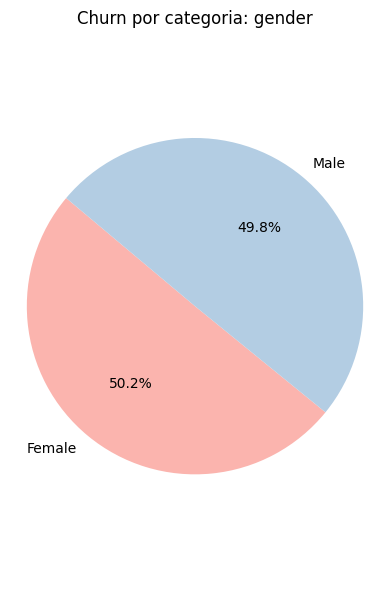

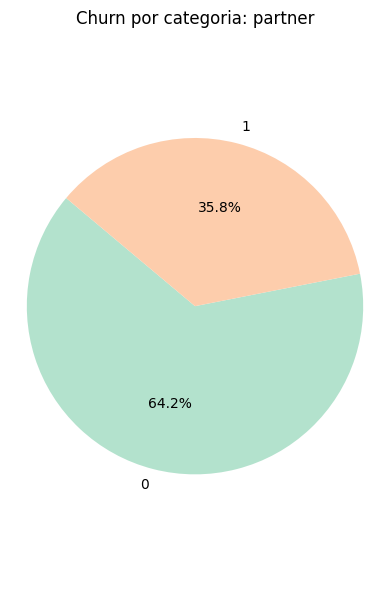

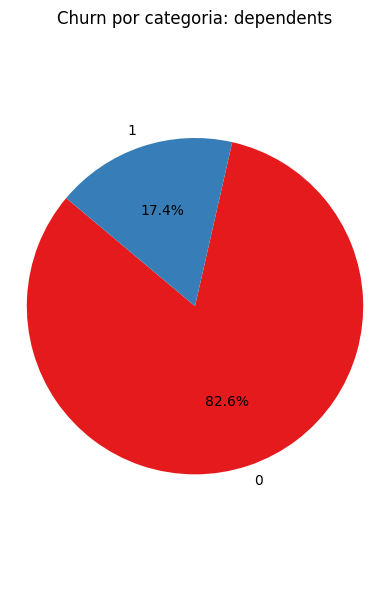

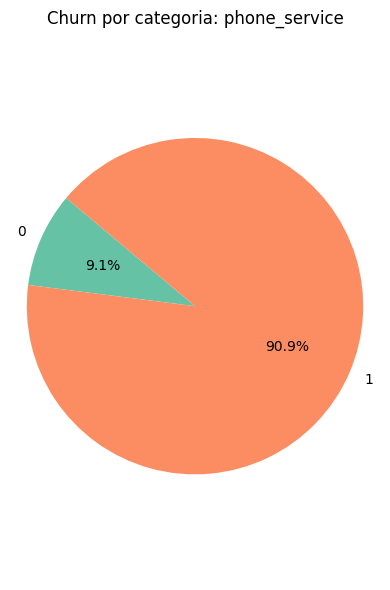

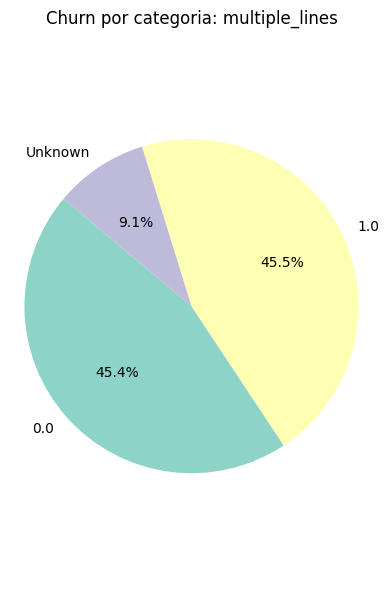

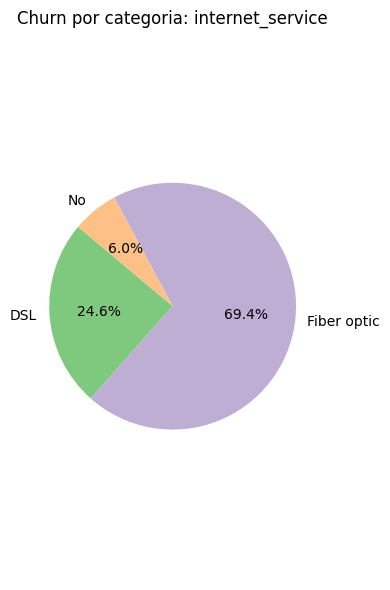

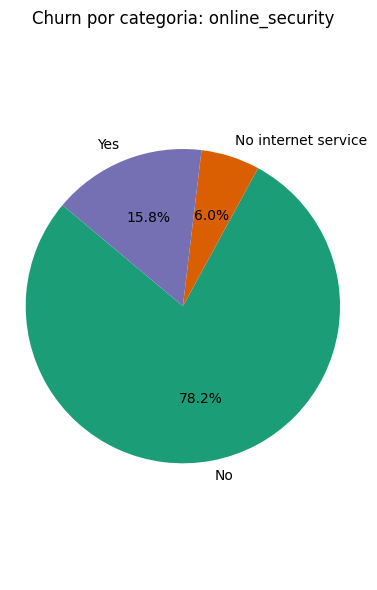

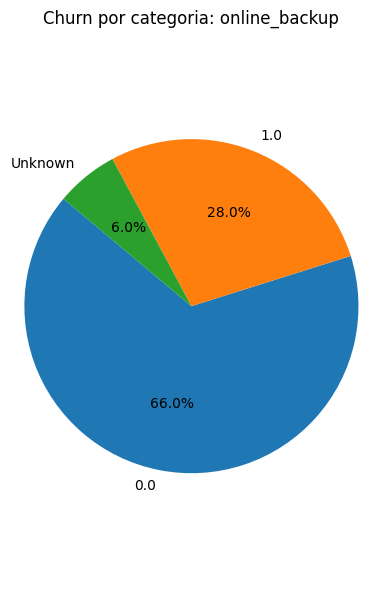

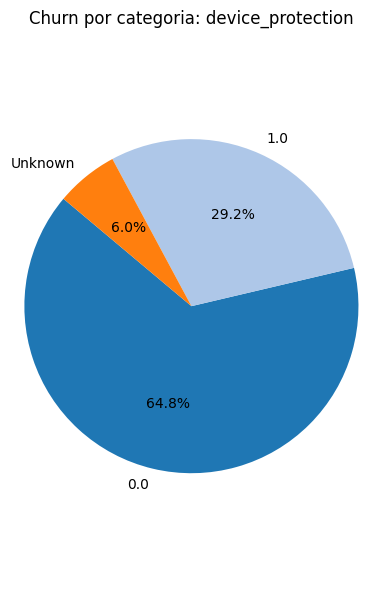

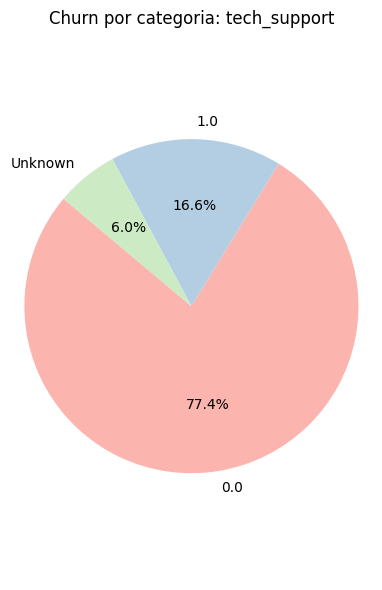

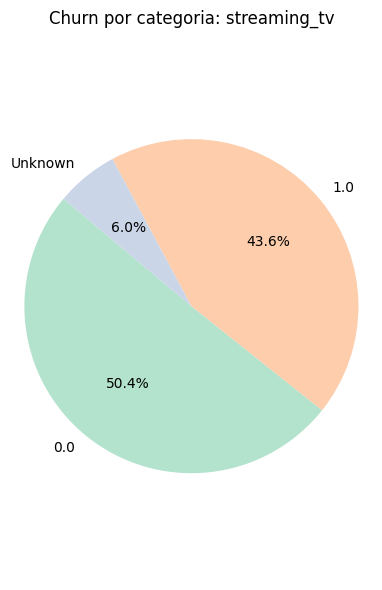

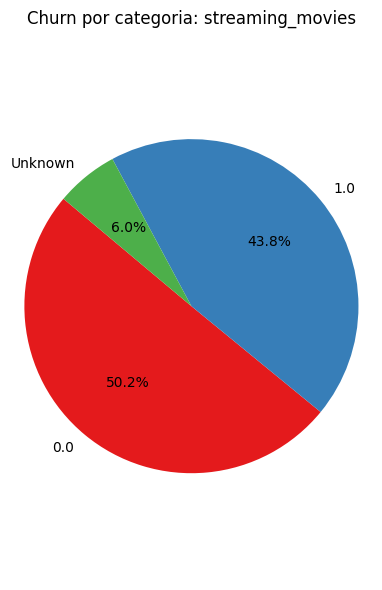

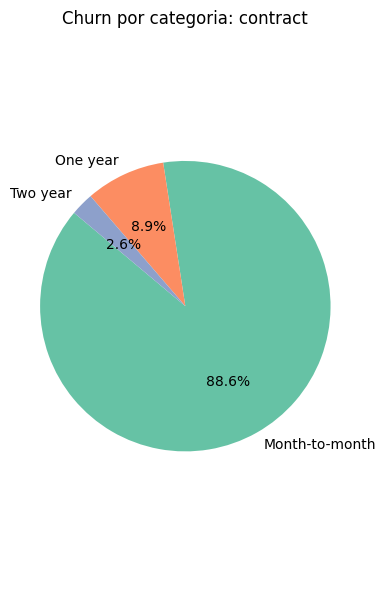

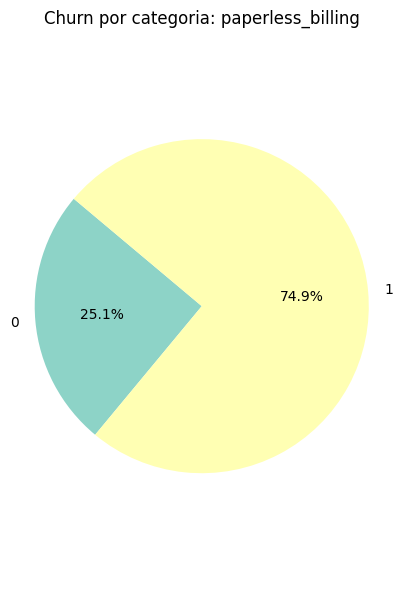

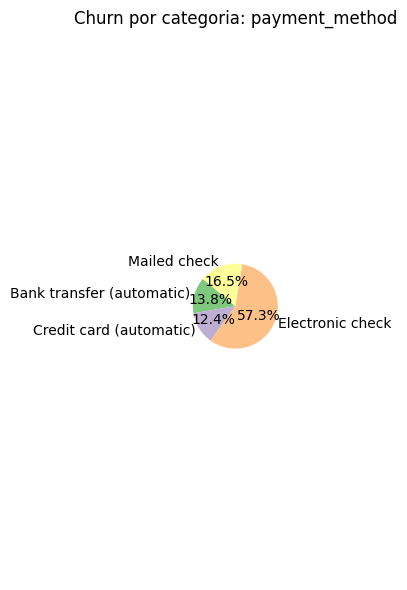

In [50]:
# Lista de colormaps para variedade visual
colormaps = [
    'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3',
    'Accent', 'Dark2', 'tab10', 'tab20'
]

# Loop para todas as variáveis categóricas
for i, (variavel, tabela) in enumerate(tabelas_churn.items()):
    # Pegamos apenas as contagens de churn = 1
    labels = tabela.index
    sizes = tabela[1]

    # Pula variáveis com churn 1 zerado (evita erro na pizza)
    if sizes.sum() == 0:
        continue

    # Seleciona um colormap diferente a cada iteração
    cmap = plt.get_cmap(colormaps[i % len(colormaps)])
    colors = cmap(range(len(labels)))

    # Criar gráfico de pizza
    plt.figure(figsize=(4, 6))
    plt.pie(
        sizes,
        labels=labels,
        autopct=lambda p: f'{p:.1f}%',  # mostra percentual de cada fatia
        colors=colors,
        startangle=140
    )
    plt.title(f'Churn por categoria: {variavel}')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# **Variáveis numéricas**

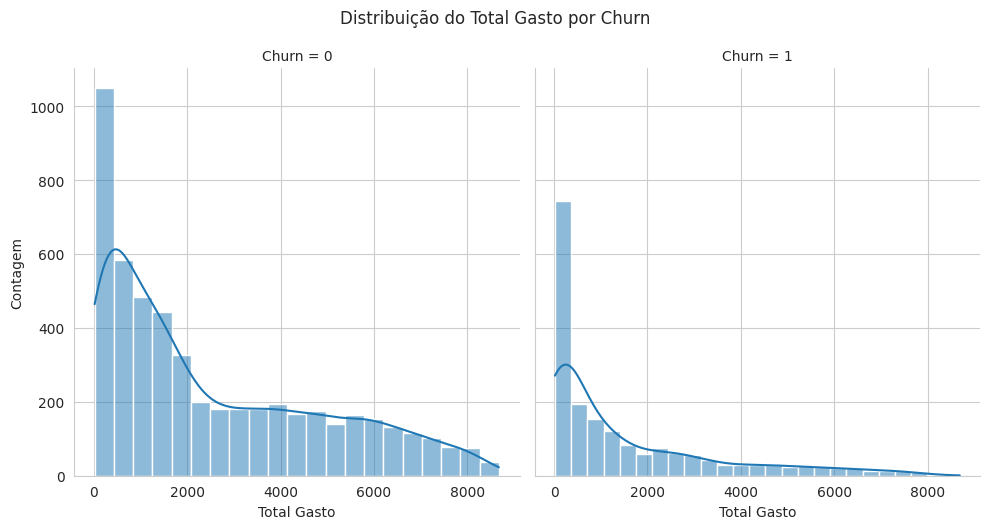

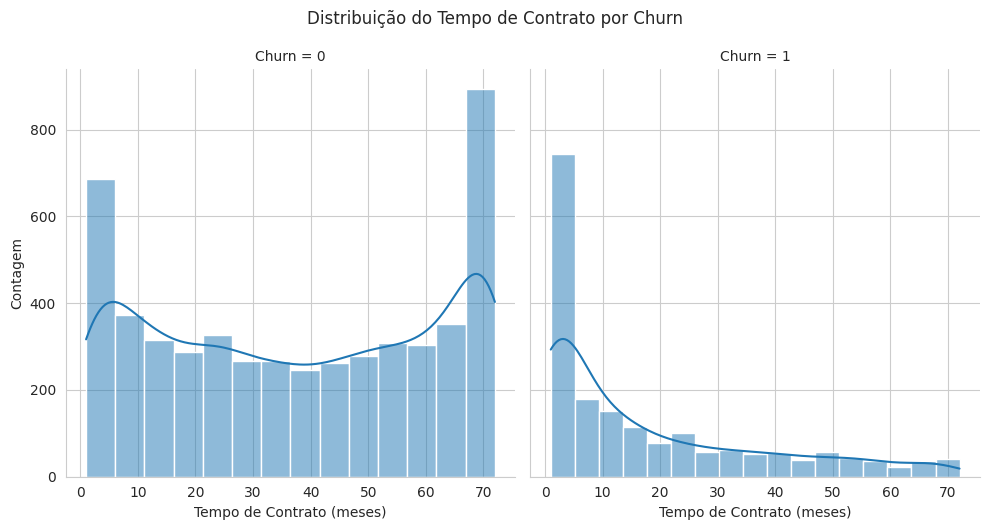

In [51]:
# Estatísticas descritivas por grupo (churn)
clientes.groupby('churn')[['charges_total', 'tenure']].describe()

# Configura o estilo dos gráficos
sns.set_style('whitegrid')

# FacetGrid para 'charges_total'
g1 = sns.FacetGrid(clientes, col='churn', height=5, aspect=1)
g1.map(sns.histplot, 'charges_total', kde=True)
g1.set_axis_labels('Total Gasto', 'Contagem')
g1.set_titles('Churn = {col_name}')
plt.suptitle('Distribuição do Total Gasto por Churn', y=1.05)
plt.show()

# FacetGrid para 'tenure' (tempo de contrato)
g2 = sns.FacetGrid(clientes, col='churn', height=5, aspect=1)
g2.map(sns.histplot, 'tenure', kde=True)
g2.set_axis_labels('Tempo de Contrato (meses)', 'Contagem')
g2.set_titles('Churn = {col_name}')
plt.suptitle('Distribuição do Tempo de Contrato por Churn', y=1.05)
plt.show()

# **Atividade Extra - Análise de Correlação entre variáveis**

Matriz de Correlação:
                      contas_diarias  quantidade_servicos     churn
contas_diarias             1.000000             0.296443  0.192914
quantidade_servicos        0.296443             1.000000 -0.171270
churn                      0.192914            -0.171270  1.000000


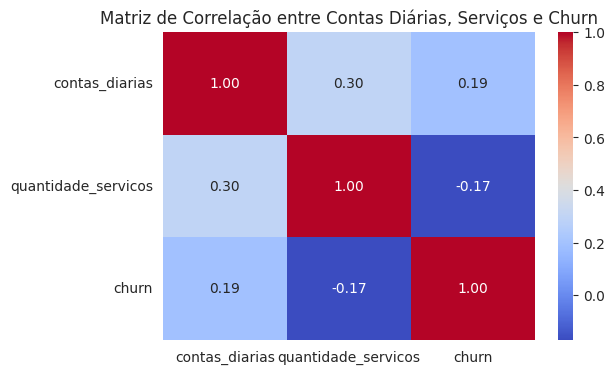

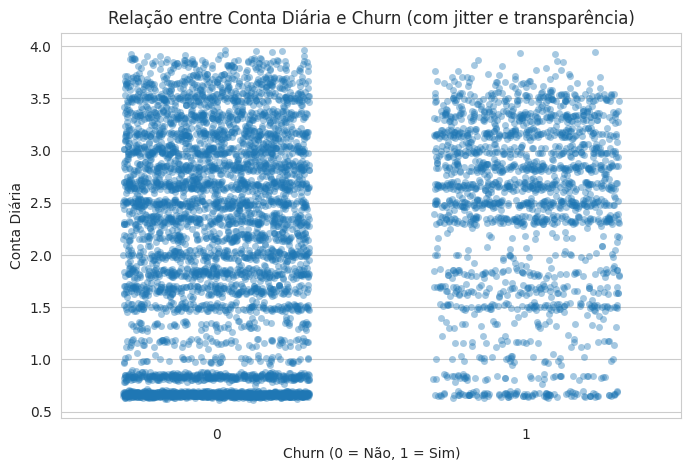

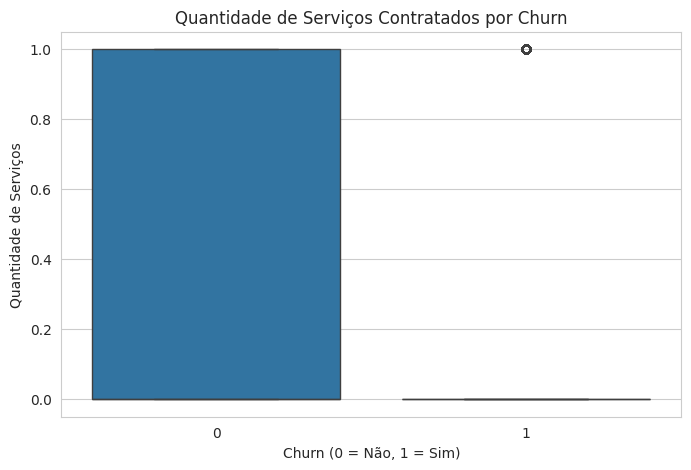

In [52]:
# Lista das colunas que indicam serviços contratados (ajuste se seus dados forem diferentes)
servicos = [
    'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies'
]

# Essas são as colunas que indicam se o cliente usa certos serviços
clientes['quantidade_servicos'] = clientes[servicos].apply(lambda x: x == 'Yes').sum(axis=1)

# Cálculo matriz de correlação para variáveis de interesse
variaveis = ['contas_diarias', 'quantidade_servicos', 'churn']
corr = clientes[variaveis].corr()
print('Matriz de Correlação:\n', corr)

# Visualização matriz de correlação com heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Contas Diárias, Serviços e Churn')
plt.show()

# Scatterplot (stripplot) para contas_diarias vs churn
plt.figure(figsize=(8,5))
sns.stripplot(x='churn', y='contas_diarias', data=clientes, jitter=0.3, alpha=0.4)
plt.title('Relação entre Conta Diária e Churn (com jitter e transparência)')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Conta Diária')
plt.show()

# Boxplot para quantidade de serviços contratados por churn
plt.figure(figsize=(8,5))
sns.boxplot(x='churn', y='quantidade_servicos', data=clientes)
plt.title('Quantidade de Serviços Contratados por Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade de Serviços')
plt.show()

#🔧 Transformação

#📊 Carga e análise

#📄Relatório Final

Este projeto analisou o fenômeno de churn na TelecomX, identificando padrões e fatores que distinguem clientes que permanecem daqueles que cancelam seus serviços.

**Principais descobertas:**

* 26,5% dos clientes abandonaram a empresa

* Clientes idosos apresentaram maior taxa de churn (41,7%)
* Pessoas sem parceiro (32,9%) e sem dependentes (31,3%) têm maior propensão a deixar a empresa
* Contratos mensais têm taxa de churn dramática (42,7%)
* Ausência de serviços adicionais aumenta significativamente o churn
* Pagamento por cheque eletrônico apresenta maior taxa de churn (45,3%)

**Recomendações principais:**

* Incentivar contratos de longo prazo com benefícios especiais
* Criar programa de boas-vindas para novos clientes
* Promover serviços adicionais
* Otimizar métodos de pagamento
* Desenvolver campanhas de retenção personalizadas